# 图32 饼图

饼图是显示组构成的经典方式。

不建议使用饼图，因为饼部分的扇形面积有时会产生误导，强烈建议明确写下饼图每个部分的百分比或数字。

原代码运行报错`TypeError: pie() got an unexpected keyword argument 'dpi'`，将`df.plot(kind='pie', subplots=True, figsize=(8, 8), dpi= 60)`改成`df.plot(kind='pie', subplots=True, figsize=(8, 8))`即可.

D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


1.23.5
2.0.0
3.7.1
0.12.2


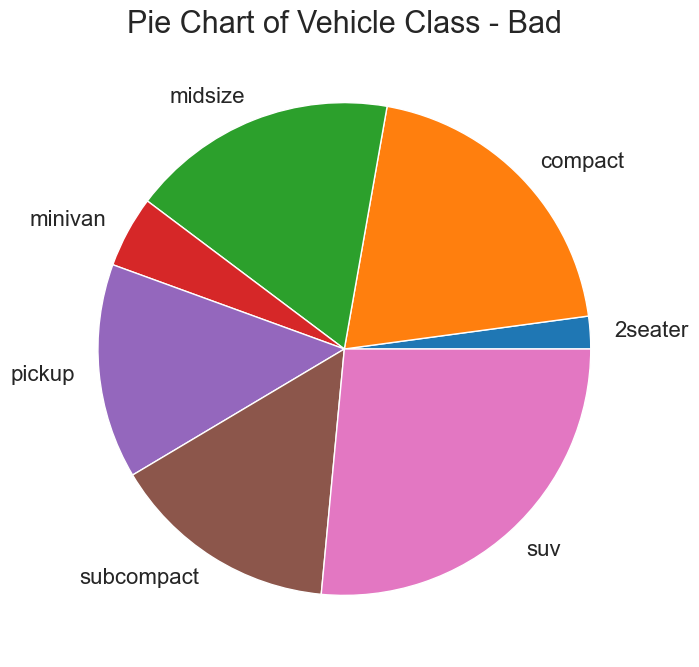

In [1]:
from doc.Plot.require import *

# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")

plt.show()

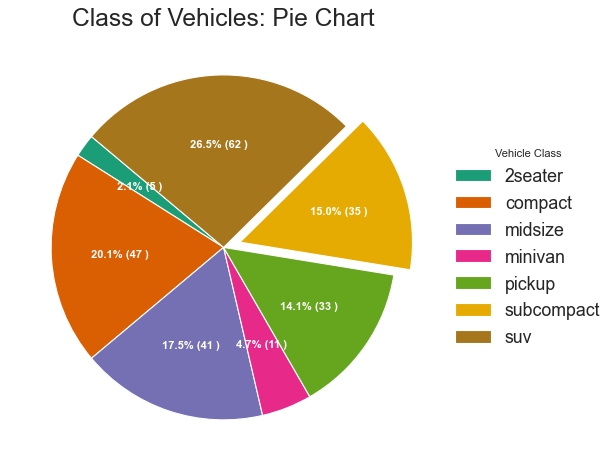

In [2]:
from doc.Plot.require import *

# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi=80)

data = df['counts']
categories = df['class']
explode = [0, 0, 0, 0, 0, 0.1, 0]


def func(num, sum_num):
    absolute = int(num / 100. * np.sum(sum_num))
    return "{:.1f}% ({:d} )".format(num, absolute)


wedges, texts, auto_texts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"),
                                   colors=plt.cm.Dark2.colors, startangle=140, explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(auto_texts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")

plt.show()